In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #for 3d plotting
import numpy as np
import pandas as pd

from sklearn.datasets import make_s_curve
data, color = make_s_curve(n_samples=1000)

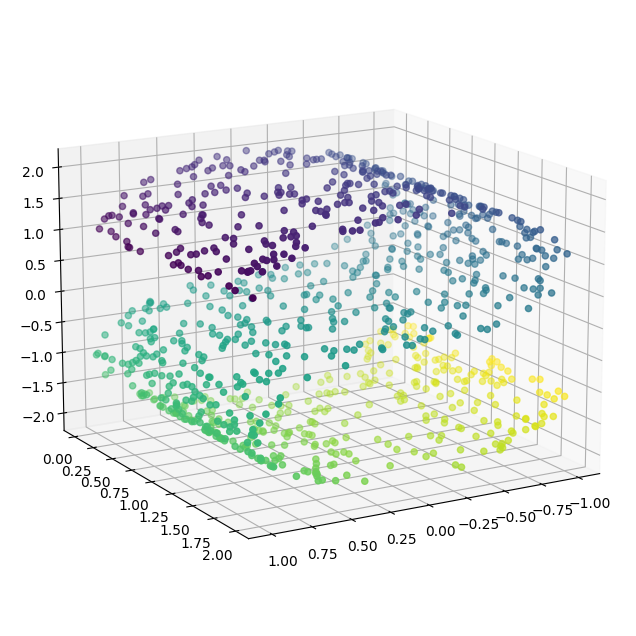

In [2]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data[:,0],ys=data[:,1],zs=data[:,2],c=color)
ax.view_init(15,60)

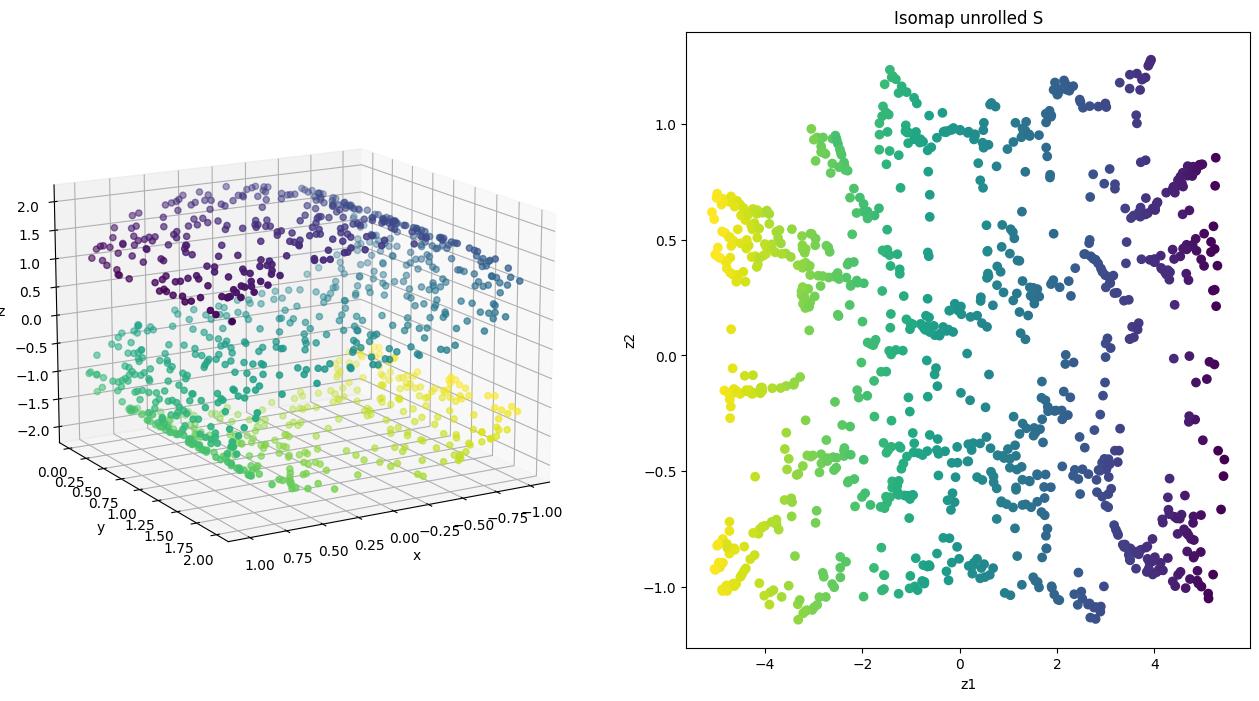

In [3]:
from sklearn.manifold import Isomap
n_neighbors = 5
n_components = 2
isomap = Isomap(n_neighbors=n_neighbors, #number of neighbors (nearest neighbors)
                                  n_components=n_components, #number of dimensions
                                  eigen_solver='auto', #for eigenvalue decomposition (values and vectors)
                                  tol=0, # only for arpack solver
                                  max_iter=None, # only for arpack solver
                                  path_method='auto', # algorithm for finding shortest path
                                  neighbors_algorithm='auto', #choose algorithm to find the nearest neighbors
                                  metric='minkowski', # can be callable, option from
                                                      # sklearn.metrics.pairwise_distances
                                                      # or precomputed, in which case X is assumed to be squared
                                                      # distance matrix
                                  p=2, # power for minkowski metric
                                  metric_params=None # additional parameters for the metric function if applicable
                                                     # pass as dictionary
                                 )
data_transf = isomap.fit_transform(data)
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(xs=data[:,0],ys=data[:,1],zs=data[:,2],c=color)
ax.view_init(15,60)
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax = fig.add_subplot(122)
ax.scatter(x=data_transf[:,0],y=data_transf[:,1],c=color)
plt.xlabel('z1')
plt.ylabel('z2')
plt.title('Isomap unrolled S')
plt.show()

#result:
#s shape goes to a flat sheet

In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import StratifiedShuffleSplit

data = fetch_openml('mnist_784', version=1)#Get data from https://www.openml.org/d/554
dfData = pd.DataFrame(np.c_[data["data"],data["target"]],columns = data["feature_names"]+["target"])
stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in stratSplit.split(dfData[data["feature_names"]], dfData["target"]):
    X_train = dfData[data["feature_names"]].iloc[train_index]
    X_test = dfData[data["feature_names"]].iloc[test_index]

    y_train = dfData["target"].iloc[train_index]
    y_test = dfData["target"].iloc[test_index]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


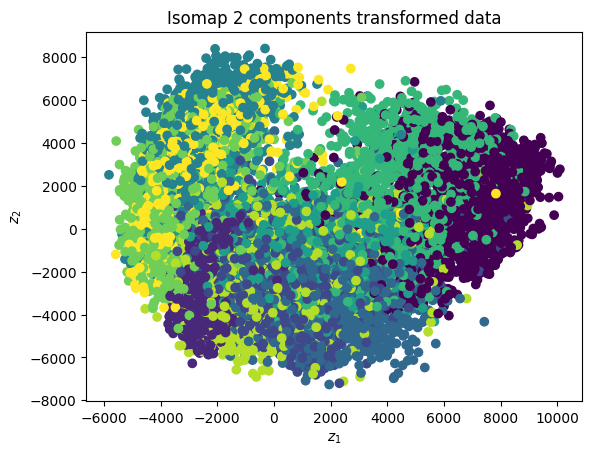

In [5]:
n_neighbors = 5
n_components = 2
isomap = Isomap(n_neighbors=n_neighbors,
                  n_components=n_components,
                  eigen_solver='auto',
                  tol=0,
                  max_iter=None,
                  path_method='auto',
                  neighbors_algorithm='auto',
                  metric='minkowski',
                  p=2,
                  metric_params=None
                 )

X_train_transf = isomap.fit_transform(X_train.iloc[:15000])
plt.scatter(X_train_transf[:, 0], X_train_transf[:, 1], c=y_train.astype(int).iloc[:15000])
plt.title('Isomap 2 components transformed data')
plt.xlabel(r'$z_1$')
plt.ylabel(r'$z_2$')
plt.show()

#result:
#messy coloring but still you can see some grouping

In [6]:
from sklearn.ensemble import RandomForestClassifier
import time

#initialize isomap
X_test_transf = isomap.transform(X_test)
rfc_clf = RandomForestClassifier()

start = time.time()

#do fitting and scoring
print('Random Forest Classifier original dataset score:',round(rfc_clf.fit(X_train.iloc[:15000],
                                                                           y_train.iloc[:15000]). \
                                                           score(X_test, y_test),3))
print('Fit and score time:',str(round(time.time()-start,2))+'s\n')
start = time.time()
print('Random Forest Classifier 2 components score:',round(rfc_clf.fit(X_train_transf,y_train.iloc[:15000]). \
                                                           score(X_test_transf, y_test),3))
print('Fit and score time using 2 component isomap result:',str(round(time.time()-start,2))+'s\n')

#accuracy for original dataset: about 96% in 13 sec
#accuracy for reduced dataset: about 44% in 6 sec (accuracy decrease because we only use 2 components instead of 700 in our mnist dataset)

Random Forest Classifier original dataset score: 0.958
Fit and score time: 13.47s

Random Forest Classifier 2 components score: 0.468
Fit and score time using 2 component isomap result: 5.89s



In [ ]:
#now increasing the number of components
#we have to initialize a new isomap
n_components = 100 #instead of 784 (features)
isomap_100 = Isomap(n_components=n_components)
X_train_transf = isomap_100.fit_transform(X_train.iloc[:15000])
X_test_transf = isomap_100.transform(X_test)
start = time.time()

print('Random Forest Classifier 100 components score:',round(rfc_clf.fit(X_train_transf,y_train.iloc[:15000]). \
                                                           score(X_test_transf, y_test),3))
print('Fit and score time using 100 component isomap result:',str(round(time.time()-start,2))+'s\n')

#result:
#still very good performance: instead of 784 features we only use 100